In [15]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [16]:
with open(f'dataframes/{4}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.756678e+09,1.756678e+09,"[104.56, 146.52, 147.06, 146.98, 146.68, 146.6...",775,1,5
1,Tag2,Tag1,1.756678e+09,1.756678e+09,"[131.72, 12.17, 12.17, 12.17, 12.32, 12.17, 12...",775,1,5
2,Tag1,Tag2,1.756678e+09,1.756678e+09,"[146.75, 212.06, 211.76, 212.21, 212.29, 211.7...",785,1,5
3,Tag2,Tag1,1.756678e+09,1.756678e+09,"[13.01, 9.8, 9.8, 9.42, 9.8, 9.58, 9.65, 9.73,...",785,1,5
4,Tag1,Tag2,1.756678e+09,1.756678e+09,"[211.76, 291.87, 292.48, 293.01, 291.79, 291.7...",795,1,5


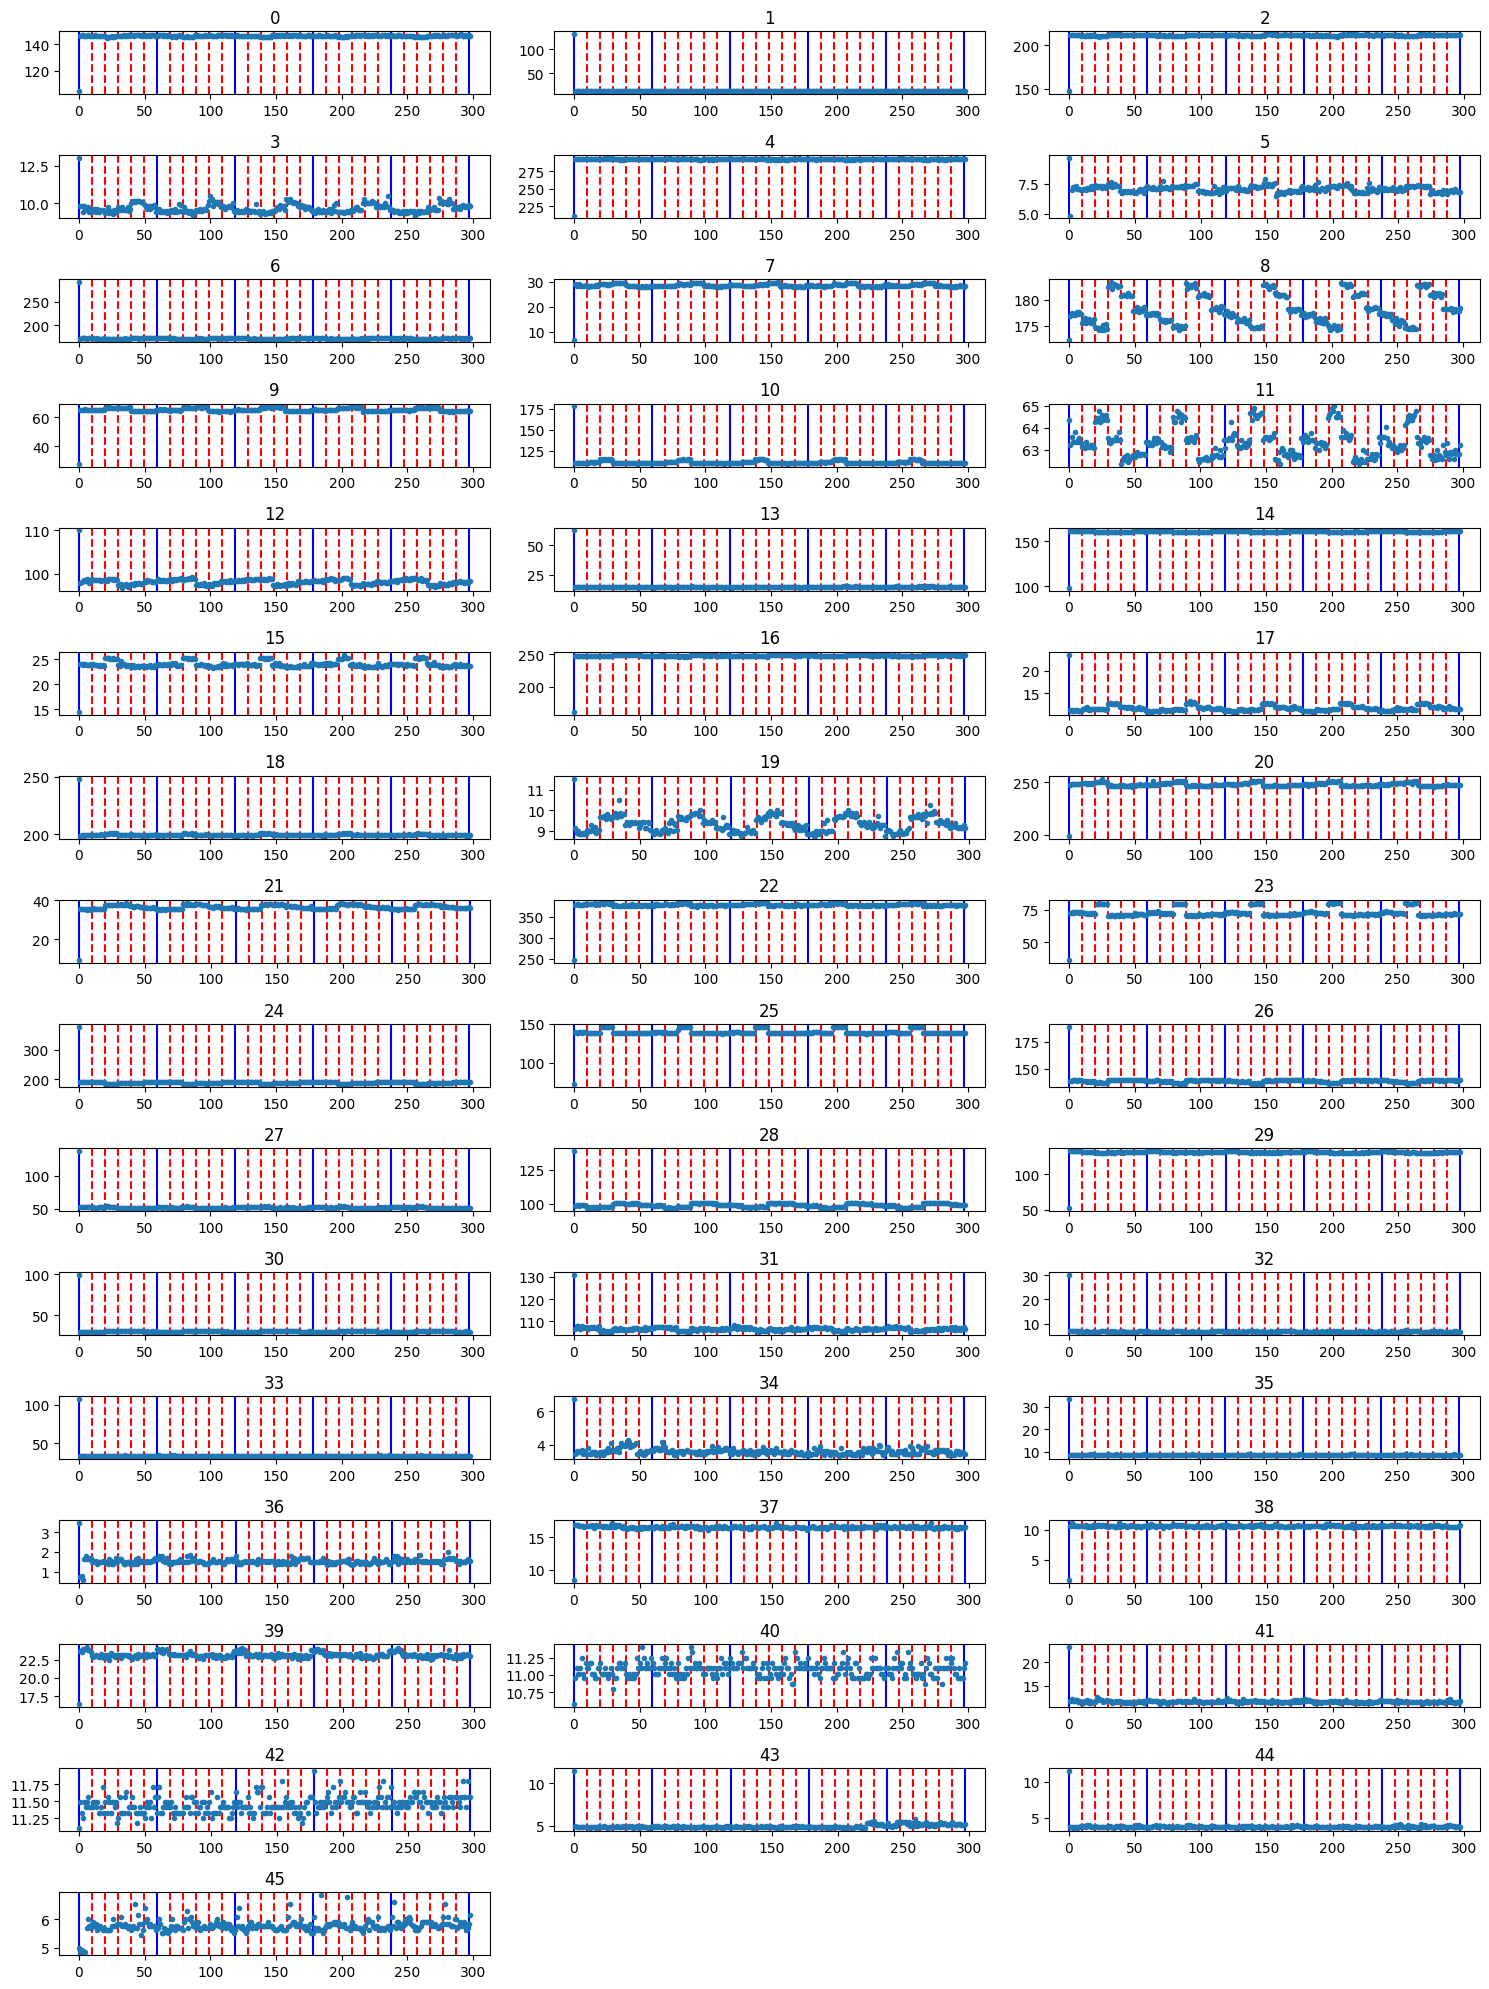

In [17]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(15,20))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [18]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[104.56, 146.52, 147.06, 146.98, 146.68, 146.6...","[146.68, 146.715, 146.565, 146.45, 146.56]","[146.335, 146.41, 146.41, 146.45, 146.3]","[145.91, 145.84, 145.765, 145.84, 145.91]","[146.6, 146.68, 146.75, 146.75, 146.64]","[146.91, 146.68, 146.945, 146.79000000000002, ...","[146.675, 146.79000000000002, 146.6, 146.675, ...",775,1,5
1,Tag2,Tag1,"[131.72, 12.17, 12.17, 12.17, 12.32, 12.17, 12...","[12.17, 12.09, 12.17, 12.17, 12.129999999999999]","[12.25, 12.285, 12.25, 12.21, 12.32]","[12.09, 12.02, 12.02, 12.02, 12.09]","[12.02, 12.09, 12.09, 12.09, 12.09]","[12.63, 12.63, 12.55, 12.55, 12.55]","[12.7, 12.7, 12.78, 12.7, 12.78]",775,1,5
2,Tag1,Tag2,"[146.75, 212.06, 211.76, 212.21, 212.29, 211.7...","[212.06, 211.99, 211.72, 211.87, 211.91]","[211.49, 211.565, 211.68, 211.565, 211.605]","[210.845, 210.88, 210.995, 211.07, 210.88]","[212.635, 212.44, 212.79000000000002, 212.67, ...","[212.365, 212.29, 212.52, 212.405, 212.29]","[212.10000000000002, 212.25, 211.95, 212.21, 2...",785,1,5
3,Tag2,Tag1,"[13.01, 9.8, 9.8, 9.42, 9.8, 9.58, 9.65, 9.73,...","[9.73, 9.46, 9.46, 9.42, 9.5]","[9.54, 9.5, 9.5, 9.5, 9.46]","[9.42, 9.42, 9.35, 9.42, 9.42]","[9.58, 9.58, 9.690000000000001, 9.615, 9.65]","[10.149999999999999, 10.11, 10.11, 10.03, 10.03]","[9.765, 9.73, 9.73, 9.765, 9.73]",785,1,5
4,Tag1,Tag2,"[211.76, 291.87, 292.48, 293.01, 291.79, 291.7...","[291.87, 292.44, 292.63, 292.44, 292.135]","[292.21000000000004, 292.63, 292.7849999999999...","[292.71, 292.515, 292.48, 292.25, 292.4]","[291.83000000000004, 291.75, 291.565, 291.635,...","[291.98, 292.02, 291.75, 292.32, 291.865]","[292.59000000000003, 292.44, 292.44, 292.365, ...",795,1,5
5,Tag2,Tag1,"[9.65, 4.84, 6.98, 7.21, 7.21, 7.29, 7.06, 7.0...","[7.06, 7.13, 7.13, 7.06, 7.02]","[7.06, 7.13, 6.98, 7.06, 7.02]","[7.21, 7.21, 7.21, 7.29, 7.29]","[7.29, 7.36, 7.52, 7.36, 7.25]","[6.83, 6.83, 6.83, 6.75, 6.79]","[6.865, 6.865, 6.9, 7.02, 6.9]",795,1,5
6,Tag1,Tag2,"[291.64, 171.85, 172.01, 172.39, 172.16, 172.3...","[172.16, 172.31, 172.16, 172.31, 172.045000000...","[171.85500000000002, 171.85, 171.89, 171.78, 1...","[170.485, 170.25, 170.29000000000002, 169.95, ...","[171.63, 171.815, 171.51, 171.78, 171.63]","[172.2, 172.31, 172.08, 172.39, 172.1600000000...","[172.39, 172.275, 172.31, 172.275, 172.275]",805,1,5
7,Tag2,Tag1,"[6.83, 28.95, 28.34, 28.8, 29.18, 28.34, 28.42...","[28.34, 28.34, 28.61, 28.380000000000003, 28.42]","[28.27, 28.27, 28.27, 28.305, 28.305]","[28.95, 28.88, 28.73, 28.8, 28.88]","[29.34, 29.41, 29.34, 29.485, 29.41]","[28.305, 28.27, 28.27, 28.19, 28.23]","[28.0, 28.11, 28.075, 28.04, 28.15]",805,1,5
8,Tag1,Tag2,"[172.31, 176.89, 177.5, 177.2, 177.04, 177.12,...","[177.2, 177.235, 177.12, 177.005, 177.2]","[175.9, 176.05, 175.9, 175.75, 175.785]","[174.565, 174.755, 174.6, 174.75, 174.52499999...","[182.64999999999998, 182.53500000000003, 182.5...","[180.78, 180.86, 180.82, 180.86, 180.895]","[177.92000000000002, 178.19, 178.03, 178.265, ...",815,1,5
9,Tag2,Tag1,"[28.11, 65.04, 65.35, 65.35, 65.27, 65.5, 65.1...","[65.27, 65.27, 65.35, 65.22999999999999, 65.27]","[65.04, 65.005, 65.005, 65.005, 64.93]","[66.68, 66.75999999999999, 66.83500000000001, ...","[66.83500000000001, 66.95, 66.99000000000001, ...","[64.35, 64.28, 64.275, 64.355, 64.2]","[64.315, 64.28, 64.51, 64.47, 64.43]",815,1,5
